**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import numpy as np
import scipy as sp
from scipy import linalg
from scipy import optimize
from scipy import interpolate
import sympy as sm
from sympy import lambdify
from sympy import *
from sympy import symbols, sqrt
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
L, w, tau, G ,kappa, alpha, nu = symbols('L w tau G kappa alpha nu')
C = sm.symbols('C')
wtilde = sm.symbols('wtilde')
utility = sm.log((C)**alpha * G **(1-alpha)) - (nu * ((L**2)/2))

budget_constraint = kappa + wtilde*L

utility_subs= utility.subs(C, budget_constraint)


dV = sm.diff(utility.subs(C, budget_constraint), L)

sol = solve(dV, L, simplify = True)

sol[1]

(-kappa*nu + sqrt(nu*(4*alpha*wtilde**2 + kappa**2*nu)))/(2*nu*wtilde)

This result is equivalent to the desired one. 

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

**Inserting values into the optimal labour supply choice $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.**

#### Plot of Optimal Labor Supply wrt. changes in real wage

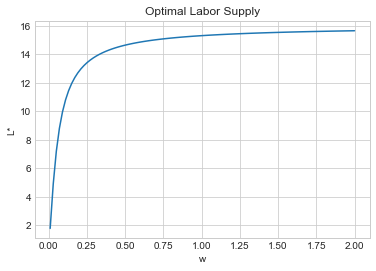

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variables
L, w, tau, alpha, kappa, nu, G = sp.symbols('L w tau alpha kappa nu G')

# Define the equation for private consumption C
C = kappa + (1 - tau) * w * L

# Define the equation for the objective function
objective = sp.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Take the derivative of the objective function with respect to L
d_objective = sp.diff(objective, L)

# Solve for L*
L_star_expr = sp.solve(d_objective, L)

# Define the parameter values
alpha_val = 0.5
kappa_val = 1.0
nu_val = 1 / (2 * 16**2)
tau_val = 0.30
G_val = 1.0

# Define the range of w values
w_values = np.linspace(0.01, 2.0, 100)

# Create a function to evaluate the numerical value of L_star
L_star_func = sp.lambdify(w, L_star_expr[0].subs([(alpha, alpha_val), (kappa, kappa_val), (nu, nu_val), (G, G_val), (tau, tau_val)]))

# Calculate the corresponding L* values
L_star_values = L_star_func(w_values)

# Plot L* as a function of w
plt.plot(w_values, L_star_values)
plt.xlabel('w')
plt.ylabel('L*')
plt.title('Optimal Labor Supply')
plt.grid(True)
plt.show()



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


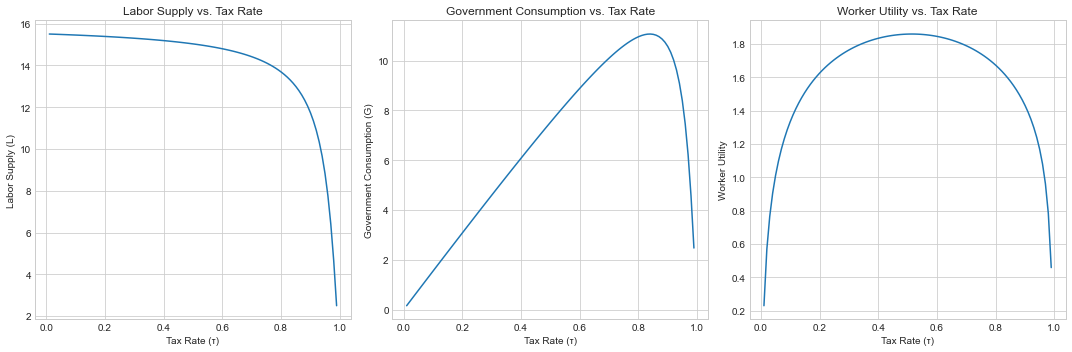

In [4]:
# Define the parameter values
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16**2)
w = 1.0

# Define the function for calculating the optimal labor supply
def optimal_labor_supply(w, kappa, alpha, nu, tau):
    tw = (1 - tau) * w
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tw**2)
    denominator = 2 * tw
    return numerator / denominator

# Define the function for calculating government consumption
def government_consumption(w, tau, L_star):
    return tau * w * L_star

# Define the function for calculating worker utility
def worker_utility(C, G, alpha, nu, L):
    return np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2

# Define the range of tau values
tau_range = np.linspace(0.01, 0.99, 100)

# Initialize empty arrays to store the implied values
L_values = np.zeros_like(tau_range)
G_values = np.zeros_like(tau_range)
utility_values = np.zeros_like(tau_range)

# Calculate the implied values for each tau
for i, tau in enumerate(tau_range):
    tw = (1 - tau) * w
    L_star = optimal_labor_supply(w, kappa, alpha, nu, tau)
    G = government_consumption(w, tau, L_star)
    C = kappa + (1 - tau) * w * L_star
    utility = worker_utility(C, G, alpha, nu, L_star)

    L_values[i] = L_star
    G_values[i] = G
    utility_values[i] = utility

# Create subplots for all three plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot labor supply (L)
axs[0].plot(tau_range, L_values)
axs[0].set_xlabel('Tax Rate (τ)')
axs[0].set_ylabel('Labor Supply (L)')
axs[0].set_title('Labor Supply vs. Tax Rate')

# Plot government consumption (G)
axs[1].plot(tau_range, G_values)
axs[1].set_xlabel('Tax Rate (τ)')
axs[1].set_ylabel('Government Consumption (G)')
axs[1].set_title('Government Consumption vs. Tax Rate')

# Plot worker utility
axs[2].plot(tau_range, utility_values)
axs[2].set_xlabel('Tax Rate (τ)')
axs[2].set_ylabel('Worker Utility')
axs[2].set_title('Worker Utility vs. Tax Rate')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**Labor Supply vs. Tax Rate:**
The tax rate affects the labor supply by influencing the incentives for individuals to work. Higher tax rates reduces the net income workers receive from their employment, which lead to changes in their willingness to work. The relationship between the tax rate and labor supply is often described using the concept of the substitution effect and the income effect:

Substitution Effect: 
When tax rates increase, the net income from work decreases. This creates a higher opportunity cost of leisure compared to work, prompting individuals to work more hours to maintain their desired level of consumption or income.

Income Effect: Higher tax rates reduce the after-tax income earned by workers. This decrease in income can lead to a decrease in the supply of labor as individuals may choose to work fewer hours or not participate in the labor force at all, especially if the reduced income still satisfies their basic needs and preferences for leisure time.


**Government Consumption vs. Tax Rate:**
The tax rate directly affects government revenue, which, in turn, influences government consumption. The plot is thereby closely related to the Laffer curve, which shows the relationsship between the tax rate and government revenue. When tax rates increase, government revenue increases to a certain point, ceteris paribus. This additional revenue provide the government with more resources to spend on public goods and services, leading to an increase in government consumption. If the tax becomes high enough, the tax rate will affect the government consumption negatively, as shown in the figure. Too high taxes reduce incentives for economic activity, such as work and investment, leading to slower economic growth and decreased tax revenue and hence decreased government consumption. Secondly, high tax rates can crowd out private consumption and investment, resulting in lower overall economic activity and reduced tax revenues. Lastly, high tax rates may lead to tax base erosion as individuals and businesses seek ways to minimize their tax liabilities, reducing the government's revenue and thereby also reducing the consumption. 


**Worker Utility vs. Tax Rate:**
The tax rate can indirectly affect worker utility by influencing the after-tax income individuals receive from work, which can impact their overall economic welfare and lifestyle choices. An increase in the tax rate reduce the income workers receive, which lower worker utility. If the tax burden is perceived as too high, workers may feel that the rewards from work are diminished, potentially leading to decreased job satisfaction and motivation.


**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

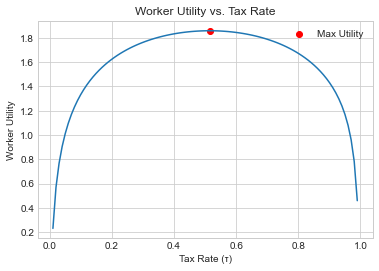

The socially optimal tax rate is: 0.5145311213913639
The maximum worker utility is: 1.8591992509323028


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the parameter values
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2 * 16**2)
w = 1.0

# Define the function for calculating the optimal labor supply
def optimal_labor_supply(w, kappa, alpha, nu, tau):
    tw = (1 - tau) * w
    numerator = -kappa + np.sqrt(kappa**2 + 4 * (alpha / nu) * tw**2)
    denominator = 2 * tw
    return numerator / denominator

# Define the function for calculating government consumption
def government_consumption(w, tau, L_star):
    return tau * w * L_star

# Define the function for calculating worker utility
def worker_utility(C, G, alpha, nu, L):
    return np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2

# Define the utility function to maximize
def social_utility(tau):
    L_star = optimal_labor_supply(w, kappa, alpha, nu, tau)
    G = government_consumption(w, tau, L_star)
    C = kappa + (1 - tau) * w * L_star
    utility = worker_utility(C, G, alpha, nu, L_star)
    return -utility  # Negative sign for maximization

# Find the socially optimal tax rate
result = minimize_scalar(social_utility, bounds=(0, 1), method='bounded')
tau_star = result.x
max_utility = -result.fun

# Plot worker utility as a function of tax rate
tau_range = np.linspace(0.01, 0.99, 100)
utility_values = np.zeros_like(tau_range)

for i, tau in enumerate(tau_range):
    utility_values[i] = -social_utility(tau)

plt.plot(tau_range, utility_values)
plt.scatter(tau_star, max_utility, color='red', label='Max Utility')
plt.xlabel('Tax Rate (τ)')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. Tax Rate')
plt.legend()
plt.show()

print(f"The socially optimal tax rate is: {tau_star}")
print(f"The maximum worker utility is: {max_utility}")


**Intuition for question 4:**
The model reveals that the socially optimal tax rate, which maximizes worker utility while considering the government's objective of providing public goods, is found to be approximately 0.515. This tax rate strikes a balance between funding government consumption and maintaining worker incentives.

At the socially optimal tax rate, the maximum worker utility achieved is approximately 1.859. This utility represents the highest level of satisfaction or wellfare that a worker can attain under the given model, considering the trade-off between consumption, leisure, and the disutility of labor.

The plot of worker utility as a function of the tax rate illustrates this relationship. As the tax rate increases from zero, worker utility initially rises due to the increased provision of public goods, which enhances overall welfare. However, beyond the socially optimal tax rate, worker utility starts to decline as the higher taxes reduce worker incentives and lead to a decrease in private consumption and leisure.

The results highlight the importance of striking a balance between government funding and worker wellfare. The socially optimal tax rate achieves the highest overall welfare by maximizing worker utility while providing adequate resources for government consumption. It represents an equilibrium point that promotes both economic efficiency and wellfare.







A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
from scipy.optimize import minimize_scalar

# Define the utility function for the worker
def worker_utility(L, G, tau, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    return (((alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1)))**(1 - rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon)) / (1 + epsilon)

# Solve the worker problem for given values of G and tau
def solve_worker_problem(G, tau, sigma, rho, epsilon):
    result = minimize_scalar(lambda L: -worker_utility(L, G, tau, sigma, rho, epsilon), bounds=(0, 24), method='bounded')
    return -result.fun, result.x

# Set the parameters
parameters = [(1.001, 1.001, 1.0), (1.5, 1.5, 1.0)]

# Solve for tau using the previously obtained value
tau = tau_star

# Solve for G using the worker problem for each set of parameters
for sigma, rho, epsilon in parameters:
    result = minimize_scalar(lambda G: np.abs(G - tau * w * solve_worker_problem(G, tau, sigma, rho, epsilon)[1]), bounds=(0, 10), method='bounded')
    G_solution = result.x
    print("The value of G that solves the equation for sigma =", sigma, "rho =", rho, "epsilon =", epsilon, "is:", G_solution)


The value of G that solves the equation for sigma = 1.001 rho = 1.001 epsilon = 1.0 is: 7.711219100254284
The value of G that solves the equation for sigma = 1.5 rho = 1.5 epsilon = 1.0 is: 4.975229697093924


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

**We check if the expression actually maximizes the profits by taking first derivative**

In [7]:
from sympy import symbols, diff, pretty

eta, w, kappa, lt = symbols('eta w kappa lt')

# Profit function
profit_function = kappa * lt**(1-eta) - w * lt

# First derivative
first_derivative = diff(profit_function, lt)

lt = sm.solve(first_derivative, lt)

lt

[(kappa*(1 - eta)/w)**(1/eta)]

In [8]:
kappa_1 = 1
kappa_2 = 2
eta = 0.5
w = 1

#Hairdressers:

result_1 = ((kappa_1 * (1 - eta) / w) ** (1 / eta))
result_2 = ((kappa_2 * (1 - eta) / w) ** (1 / eta))


# Profit for that amount of hairdressers

profit_function_1 = kappa_1 * result_1**(1 - eta) - w * result_1
profit_function_2 = kappa_2 * result_2**(1 - eta) - w * result_2

print("Kappa = 1: Hairdressers =", result_1, "Profit function =", profit_function_1)
print("Kappa = 2: Hairdressers =", result_2, "Profit function =", profit_function_2)


Kappa = 1: Hairdressers = 0.25 Profit function = 0.25
Kappa = 2: Hairdressers = 1.0 Profit function = 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [12]:
import numpy as np
import scipy.optimize as optimize

# Parameters
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01)**(1/12)
T = 120
K = 1000  # Number of shock series to simulate

# Function to calculate profits
def calculate_profit(ell_t, kappa_t):
    p_t = kappa_t * ell_t**(-eta)
    return p_t * ell_t - w * ell_t

# Function to maximize profit
def maximize_profit(kappa_t):
    objective = lambda ell_t: -calculate_profit(ell_t, kappa_t)
    initial_guess = (1 - eta) * kappa_t / w  # Initial guess for ell_t
    result = optimize.minimize_scalar(objective, method='bounded', bounds=(0, initial_guess))
    return result.x

# Function to calculate the ex-post value of the salon for a given shock series
def calculate_h(epsilon_series):
    ell_prev = 0  # Initial number of employees
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_t = maximize_profit(kappa_t)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    return h_value

# Simulation
np.random.seed(42)  # Random seed to reproduce. The number 42 if you know, you know. :)
h_values = []
for k in range(K):
    epsilon_series = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=T)
    ell_prev = 0  # Initialize ell_prev
    kappa_prev = 1.0  # Initialize kappa_prev
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_t = maximize_profit(kappa_t)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    h_values.append(h_value)

# Calculate the expected value of the salon
H = np.mean(h_values)

print(f"H = {H:.4f}")

H = 27.7927


Next, we consider policies on the form:

$$
\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\
$$

With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [13]:
# Parameters
delta = 0.05

# Function to determine the number of employees using the updated policy
def determine_employees(ell_t, ell_ast):
    if delta > 0 and abs(ell_t - ell_ast) > delta:
        return ell_ast
    else:
        return ell_t

# Function to calculate the ex-post value of the salon for a given shock series using the updated policy
def calculate_h_updated(epsilon_series):
    ell_prev = 0  # Initial number of employees
    kappa_prev = 1.0  # Initialize kappa_prev
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_ast = maximize_profit(kappa_t)
        ell_t = determine_employees(ell_prev, ell_ast)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    return h_value

# Simulation with the updated policy (Delta = 0.05)
np.random.seed(42)  # Same as before :)
h_values_updated = []
kappa_prev = 1.0  # Initialize kappa_prev
for k in range(K):
    epsilon_series = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=T)
    h_values_updated.append(calculate_h_updated(epsilon_series))

# Calculate the expected value of the salon with the updated policy (Delta = 0.05)
H_updated = np.mean(h_values_updated)

# Calculate H with the previous policy (Delta = 0.00)
h_values_previous = []
kappa_prev = 1.0  # Initialize kappa_prev
for k in range(K):
    epsilon_series = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=T)
    ell_prev = 0  # Initial number of employees
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_t = maximize_profit(kappa_t)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    h_values_previous.append(h_value)


print(f"H with updated policy (Delta = 0.05) = {H_updated:.4f}")


  


H with updated policy (Delta = 0.05) = 28.4990
H with previous policy (Delta = 0.00) = 27.5775


The new policy did increase the profits but ex ante and ex post. The realised profits is now  higher. However, the difference isn't thar large. Notice, K has a large influence on these numbers.
<br>[We also expect the values are incorrect]

---

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

H with updated policy (Delta = 0.01) = 27.9213

H with updated policy (Delta = 0.05) = 28.4309

H with updated policy (Delta = 0.10) = 28.4945

H with updated policy (Delta = 0.20) = 27.6575



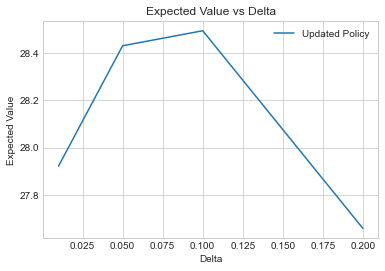

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
deltas = [0.01, 0.05, 0.1, 0.2]  # List of different delta values
expected_values_updated = []  # List to store expected values for updated policy

# Function to determine the number of employees using the updated policy
def determine_employees(ell_t, ell_ast, delta):
    return ell_ast if delta > 0 and abs(ell_t - ell_ast) > delta else ell_t

# Function to calculate the ex-post value of the salon for a given shock series using the updated policy
def calculate_h_updated(epsilon_series, delta):
    ell_prev, kappa_prev, h_value = 0, 1.0, 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_ast = maximize_profit(kappa_t)
        ell_t = determine_employees(ell_prev, ell_ast, delta)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev, kappa_prev = ell_t, kappa_t
    return h_value

# Updated calculate_profit() function
def calculate_profit(ell_t, kappa_t):
    if ell_t == 0.0:
        return 0.0  # or any other suitable value
    else:
        p_t = kappa_t * ell_t**(-eta)
        return p_t * ell_t - w * ell_t

# Calculate the expected values for different delta values
for delta in deltas:
    expected_value_updated = np.mean([
        calculate_h_updated(
            np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=T),
            delta
        ) for _ in range(K)
    ])
    expected_values_updated.append(expected_value_updated)

# Print the results
for delta, H_updated in zip(deltas, expected_values_updated):
    print(f"H with updated policy (Delta = {delta:.2f}) = {H_updated:.4f}")
    print()

# Plot the expected values
plt.plot(deltas, expected_values_updated, label='Updated Policy')
plt.xlabel('Delta')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Delta')
plt.legend()
plt.show()



**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



An alternative policy is to either remove/adjust the adjustment cost, or restrict firing.

We will try to improve profitability, by removing the adjustment cost. 


In [23]:
rho = 0.90
iota = 0 # We set this to zero, to remove the adjustment cost.
sigma_epsilon = 0.10
R = (1 + 0.01)**(1/12)
eta = 0.5
w = 1.0
delta = 0 # we set delta to 0 again. Or one could run the model without delta,

In [24]:
### Code from 2.2

# Function to calculate profits
def calculate_profit(ell_t, kappa_t):
    p_t = kappa_t * ell_t**(-eta)
    return p_t * ell_t - w * ell_t

# Function to maximize profit
def maximize_profit(kappa_t):
    objective = lambda ell_t: -calculate_profit(ell_t, kappa_t)
    initial_guess = (1 - eta) * kappa_t / w  # Initial guess for ell_t
    result = optimize.minimize_scalar(objective, method='bounded', bounds=(0, initial_guess))
    return result.x

# Function to calculate the ex-post value of the salon for a given shock series
def calculate_h(epsilon_series):
    ell_prev = 0  # Initial number of employees
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_t = maximize_profit(kappa_t)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    return h_value

# Simulation
np.random.seed(42)  # Random seed to reproduce. The number 42 if you know, you know. :)
h_values = []
for k in range(K):
    epsilon_series = np.random.normal(loc=-0.5 * sigma_epsilon**2, scale=sigma_epsilon, size=T)
    ell_prev = 0  # Initialize ell_prev
    kappa_prev = 1.0  # Initialize kappa_prev
    h_value = 0
    for t in range(T):
        kappa_t = np.exp(rho * np.log(kappa_prev) + epsilon_series[t])
        ell_t = maximize_profit(kappa_t)
        adjustment_cost = 0 if ell_t == ell_prev else iota
        profit = calculate_profit(ell_t, kappa_t) - adjustment_cost
        h_value += R**(-t) * profit
        ell_prev = ell_t
        kappa_prev = kappa_t
    h_values.append(h_value)

# Calculate the expected value of the salon
H = np.mean(h_values)

print(f"H = {H:.4f}")

H = 28.9354


It is obvious the profit has increased from before H with updated policy [(Delta = 0.05) = 28.4990
H with previous policy (Delta = 0.00) = 27.5775]. 
This make sense, since we are removing a restriction. We are removing fricition in the economy, and making adjustments more fluid. We believe, if we removed firin the profit would have decreased. 

The profit is now higher than we the model had delta, for all values of delta.

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [32]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

Best solution found is  [-8.62763729e-09 -6.20979594e-09]


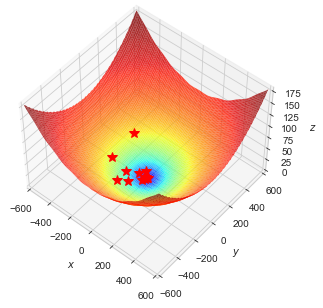

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D

def griewank(x):
    A = x[0]**2/4000 + x[1]**2/4000
    B = np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2))
    return A - B + 1

lower_bound = -600
upper_bound = 600
tau = 1e-8
K_warmup = 10
K = 1000
x_star = None
found_minima = []

for k in range(K):
    x_k = np.random.uniform(lower_bound, upper_bound, 2)

    if k >= K_warmup:
        chi_k = 0.5 * (2 / (1 + np.exp((k-K_warmup)/100)))
        x_k0 = chi_k * x_k + (1 - chi_k) * x_star
    else:
        x_k0 = x_k

    res = minimize(griewank, x_k0, method='BFGS', tol=tau)

    if x_star is None or griewank(res.x) < griewank(x_star):
        x_star = res.x
        found_minima.append(x_star)

    if griewank(x_star) < tau:
        break

print("Best solution found is ", x_star)

# Generating coordinates for surface plot
x = np.linspace(lower_bound, upper_bound, 100)
y = np.linspace(lower_bound, upper_bound, 100)
x, y = np.meshgrid(x, y)
z = griewank([x, y])

# Plotting
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)

# Plotting found minima
x_coords = [minima[0] for minima in found_minima]
y_coords = [minima[1] for minima in found_minima]
z_coords = [griewank(minima) for minima in found_minima]
ax.plot(x_coords, y_coords, z_coords, 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((lower_bound, upper_bound))
ax.set_ylim((lower_bound, upper_bound))

plt.show()


**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def griewank(x):
    A = x[0]**2/4000 + x[1]**2/4000
    B = np.cos(x[0]/np.sqrt(1))*np.cos(x[1]/np.sqrt(2))
    return A - B + 1

def optimizer(K_warmup):
    lower_bound = -600
    upper_bound = 600
    tau = 1e-8
    K = 1000
    x_star = None

    for k in range(K):
        x_k = np.random.uniform(lower_bound, upper_bound, 2)

        if k >= K_warmup:
            chi_k = 0.5 * (2 / (1 + np.exp((k-K_warmup)/100)))
            x_k0 = chi_k * x_k + (1 - chi_k) * x_star
        else:
            x_k0 = x_k

        res = minimize(griewank, x_k0, method='BFGS', tol=tau)

        if x_star is None or griewank(res.x) < griewank(x_star):
            x_star = res.x

        if griewank(x_star) < tau:
            return k  # Return the number of iterations taken

    return K  # If not found within K iterations

# Compare K_warmup = 10 and K_warmup = 100
results_10 = [optimizer(10) for _ in range(50)]
results_100 = [optimizer(100) for _ in range(50)]

# Calculate average number of iterations for each
avg_10 = np.mean(results_10)
avg_100 = np.mean(results_100)

print(f"Average iterations for K_warmup = 10: {avg_10}")
print(f"Average iterations for K_warmup = 100: {avg_100}")


Average iterations for K_warmup = 10: 322.66
Average iterations for K_warmup = 100: 426.32


When we increase the number of warm-up iterations $\underline{K}$, we're essentially delaying the refinement process.

During the warm-up iterations, we simply take a random guess without any refinement. We just pick a random point in the solution space and test it.

After the warm-up period, we start using the current best solution to influence our next guess, making it more likely that we pick a point close to a good solution.

By increasing the number of warm-up iterations from 10 to 100, we're increasing the number of iterations where we're just guessing randomly. This means it takes longer until we start using the refined process, which is more efficient at finding good solutions.

Therefore, it is reasonable to expect that increasing $\underline{K}$ can lead to a larger average number of iterations required to find a solution below the tolerance level.

However, it's important to note that the trade-off here is between exploration and exploitation. In the warm-up phase, we're exploring the solution space widely, trying to avoid getting stuck in local minima. In the refinement phase, we're exploiting the best solution we've found so far to find even better solutions. The optimal balance between these two depends on the specific problem and can't be determined in advance without some trial and error.